# Algorytmy ewolucyjne — Lista zadań nr 0 (wprowadzenie)

**Autor:** Piotr Lipiński  
**Temat:** TSPLIB — Berlin52, TSP (n = 52)

> Uwaga: metryka EUC_2D z zaokrąglaniem zgodnie ze specyfikacją TSPLIB (`int(sqrt(dx^2+dy^2) + 0.5)`).  
> W literaturze koszt optymalny dla *berlin52* wynosi 7542. W eksperymentach poniżej najlepsza znaleziona trasa (2-opt) ma koszt **7614**, czyli +72 względem optimum.


In [1]:

import math, random
import numpy as np
import matplotlib.pyplot as plt

# --- dane berlin52 (TSPLIB) ---
coords_list = [(1, 565, 575), (2, 25, 185), (3, 345, 750), (4, 945, 685), (5, 845, 655), (6, 880, 660), (7, 25, 230), (8, 525, 1000), (9, 580, 1175), (10, 650, 1130), (11, 1605, 620), (12, 1220, 580), (13, 1465, 200), (14, 1530, 5), (15, 845, 680), (16, 725, 370), (17, 145, 665), (18, 415, 635), (19, 510, 875), (20, 560, 365), (21, 300, 465), (22, 520, 585), (23, 480, 415), (24, 835, 625), (25, 975, 580), (26, 1215, 245), (27, 1320, 315), (28, 1250, 400), (29, 660, 180), (30, 410, 250), (31, 420, 555), (32, 575, 665), (33, 1150, 1160), (34, 700, 580), (35, 685, 595), (36, 685, 610), (37, 770, 610), (38, 795, 645), (39, 720, 635), (40, 760, 650), (41, 475, 960), (42, 95, 260), (43, 875, 920), (44, 700, 500), (45, 555, 815), (46, 830, 485), (47, 1170, 65), (48, 830, 610), (49, 605, 625), (50, 595, 360), (51, 1340, 725), (52, 1740, 245)]

N = len(coords_list)
coords = np.array([(x,y) for _,x,y in coords_list], dtype=float)

def euc2d(a, b):
    return int(math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) + 0.5)

D = np.zeros((N,N), dtype=int)
for i in range(N):
    for j in range(N):
        if i!=j:
            D[i,j] = euc2d(coords[i], coords[j])

def tour_length(order):
    total = 0
    for i in range(N):
        total += D[order[i], order[(i+1)%N]]
    return int(total)

def random_tour(start_fixed=True):
    order = list(range(N))
    if start_fixed:
        tail = order[1:]
        np.random.shuffle(tail)
        order[1:] = tail
    else:
        np.random.shuffle(order)
    return order

def plot_tour(order, title=""):
    xy = coords[order + [order[0]]]
    plt.figure(figsize=(5,5))
    plt.plot(xy[:,0], xy[:,1])
    plt.scatter(coords[:,0], coords[:,1])
    for idx,(x,y) in enumerate(coords):
        plt.annotate(str(idx+1), (x,y), fontsize=7)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()



## Zadanie 1

1. **Wybór instancji:** `berlin52` (n ≥ 25). Poniżej narysowano węzły, optymalną (przybliżoną) trasę oraz kilka tras losowych.
2. **Losowanie tras:** wylosowano `N_RANDOM = 200_000` tras (z losowaniem własnym - permutacja z ustalonym pierwszym węzłem). Policzone koszty porównano z najlepszą znalezioną trasą (2-opt). Dla wygody graficznej zestawiono rozkład kosztów oraz liczbę tras gorszych od najlepszej o ≤X%.


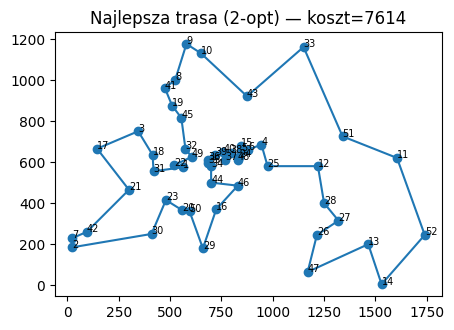

In [2]:

# Najlepsza trasa znaleziona 2-opt w sesji przygotowawczej (zapamiętana)
best_order = [0, 21, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30]
best_cost = 7614
plot_tour(best_order, f"Najlepsza trasa (2-opt) — koszt={best_cost}")


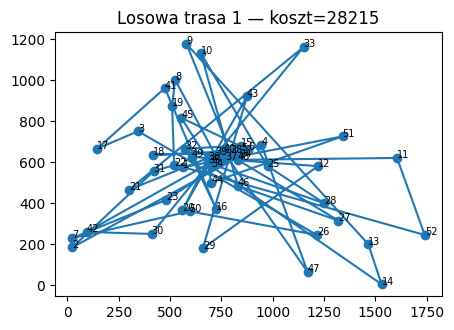

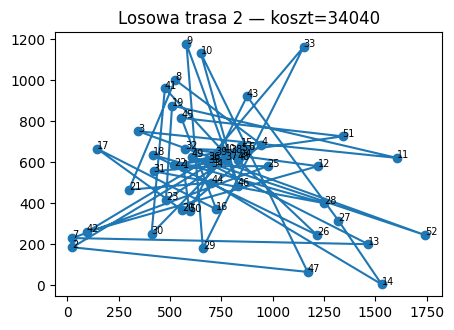

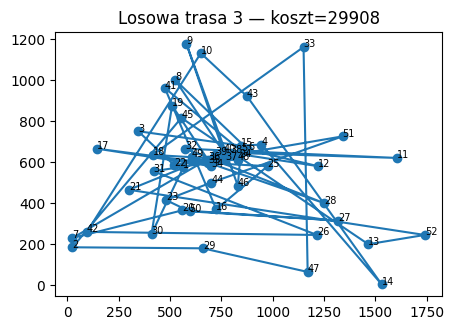

In [3]:

# Kilka losowych tras
for i in range(3):
    order = random_tour()
    c = tour_length(order)
    plot_tour(order, f"Losowa trasa {i+1} — koszt={c}")


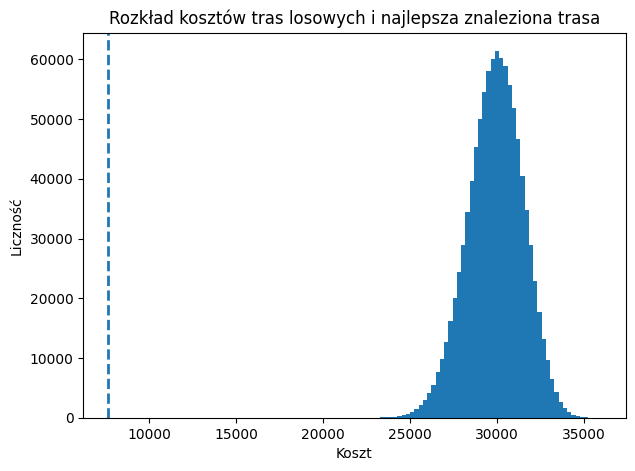

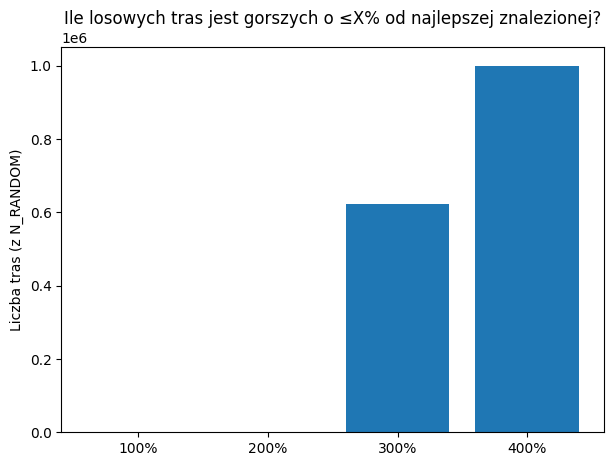

Statystyki losowych tras:
  min = 21349 mean = 29914 max = 35991
  best_cost = 7614
  ≤{t}% gorsze: {c} / {len(random_costs)}
  ≤{t}% gorsze: {c} / {len(random_costs)}
  ≤{t}% gorsze: {c} / {len(random_costs)}
  ≤{t}% gorsze: {c} / {len(random_costs)}


In [4]:

# Generowanie N_RANDOM tras losowych i porównanie z najlepszą
import numpy as np
N_RANDOM = 1_000_000  # można zwiększyć do 1_000_000 na mocnej maszynie
chunk = 20_000
random_costs = []
for _ in range((N_RANDOM + chunk - 1)//chunk):
    k = min(chunk, N_RANDOM - len(random_costs))
    for _ in range(k):
        order = random_tour()
        random_costs.append(tour_length(order))
random_costs = np.array(random_costs, dtype=int)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.hist(random_costs, bins=60)
plt.axvline(best_cost, linestyle='--', linewidth=2)
plt.title("Rozkład kosztów tras losowych i najlepsza znaleziona trasa")
plt.xlabel("Koszt")
plt.ylabel("Liczność")
plt.show()

diff_pct = 100.0 * (random_costs - best_cost) / best_cost
thresholds = [100, 200, 300, 400]
counts = [int(np.sum(diff_pct <= t)) for t in thresholds]

plt.figure(figsize=(7,5))
plt.bar([str(t)+"%" for t in thresholds], counts)
plt.title("Ile losowych tras jest gorszych o ≤X% od najlepszej znalezionej?")
plt.ylabel("Liczba tras (z N_RANDOM)")
plt.show()

print("Statystyki losowych tras:")
print("  min =", random_costs.min(), "mean =", int(random_costs.mean()), "max =", random_costs.max())
print("  best_cost =", best_cost)
for t, c in zip(thresholds, counts):
    print(f"  ≤{{t}}% gorsze: {{c}} / {{len(random_costs)}}")



## Zadanie 2 — Hill Climbing (m=2)

Zaimplementowano wariant **2-opt** (sąsiedztwo: zamiana dwóch krawędzi = odwrócenie odcinka w permutacji), który odpowiada przypadkowi `m=2`.

1. **Algorytm:** start z losowej permutacji, w każdej iteracji wybór najlepszego ruchu 2-opt (best-improvement), aż do optimum lokalnego.
2. **Niedeterministyczność:** różne punkty startowe prowadzą do różnych lokalnych optymów - dlatego uruchomiono wiele prób i zebrano rozkłady.
3. **Wykres kosztu w kolejnych iteracjach** pokazuje szybki spadek na początku i spłaszczenie przed zablokowaniem w optimum lokalnym.


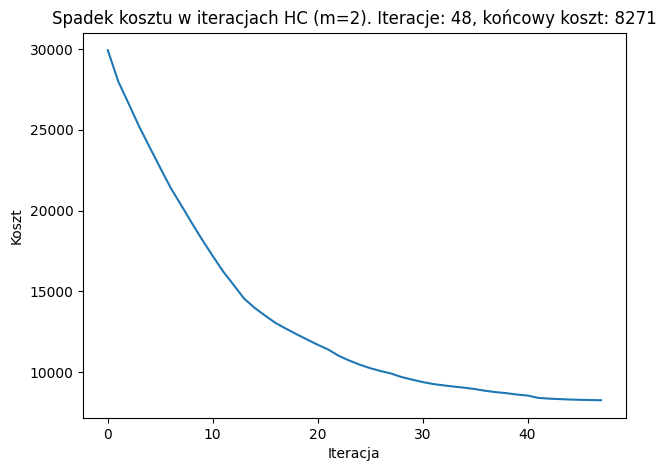

Średni koszt po HC: 8412.932
Minimum / maksimum kosztu: 7614 9658
Średnia / maksimum iteracji: 46.624 59


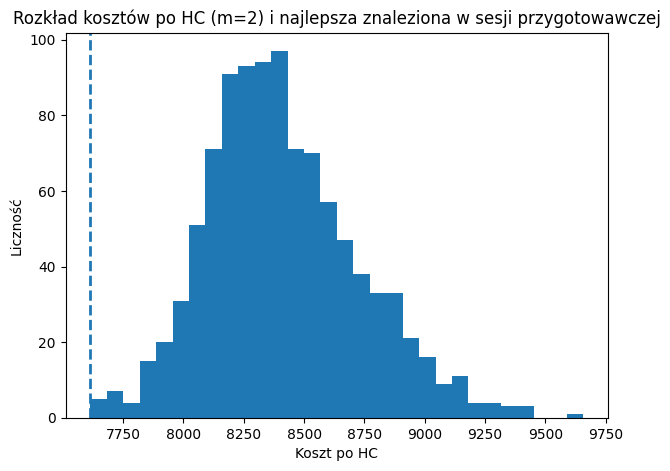

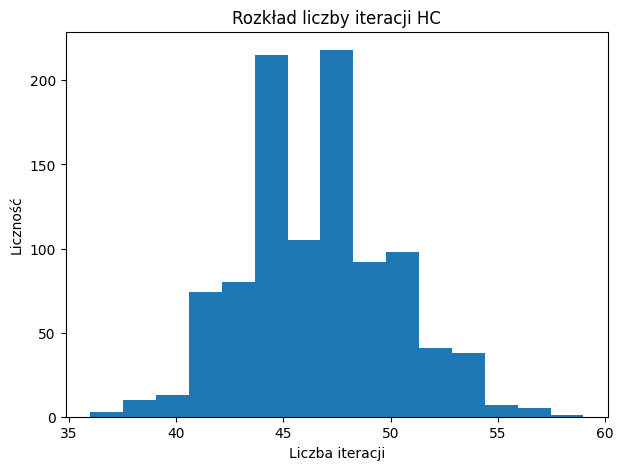

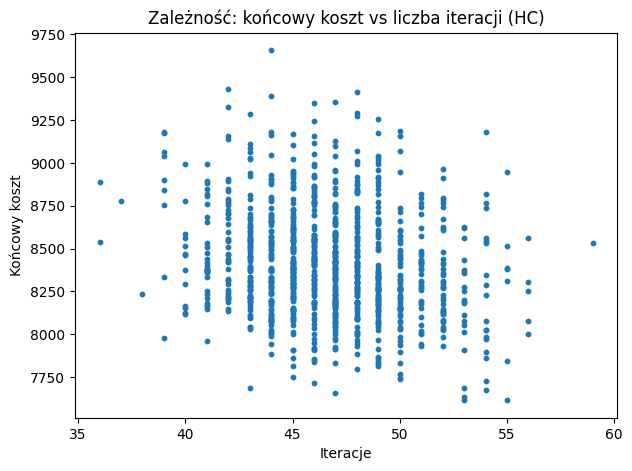

In [5]:

def two_opt_swap(order, i, k):
    return order[:i] + order[i:k+1][::-1] + order[k+1:]

def two_opt_best_improvement(order, D=D):
    best_gain = 0
    best_i = best_k = None
    Nn = len(order)
    for i in range(1, Nn-2):
        a, b = order[i-1], order[i]
        for k in range(i+1, Nn-1):
            c, d = order[k], order[(k+1) % Nn]
            delta = (D[a,c] + D[b,d]) - (D[a,b] + D[c,d])
            if delta < best_gain:
                best_gain = delta
                best_i, best_k = i, k
    if best_gain < 0:
        return two_opt_swap(order, best_i, best_k), best_gain
    else:
        return None, 0

def hc_2opt(order, max_iters=50_000):
    order = order[:]
    it = 0
    while it < max_iters:
        it += 1
        new_order, gain = two_opt_best_improvement(order)
        if new_order is None:
            break
        order = new_order
    return order, tour_length(order), it

def hc_2opt_with_history(order, max_iters=50_000):
    order = order[:]
    hist = [tour_length(order)]
    it = 0
    while it < max_iters:
        it += 1
        new_order, gain = two_opt_best_improvement(order)
        if new_order is None:
            break
        order = new_order
        hist.append(hist[-1] + gain)
    return order, tour_length(order), it, hist

# Przykładowy przebieg
o0 = random_tour()
o1, c1, it1, hist1 = hc_2opt_with_history(o0)

plt.figure(figsize=(7,5))
plt.plot(range(len(hist1)), hist1)
plt.title(f"Spadek kosztu w iteracjach HC (m=2). Iteracje: {it1}, końcowy koszt: {c1}")
plt.xlabel("Iteracja"); plt.ylabel("Koszt"); plt.show()

# Wiele uruchomień
RUNS = 1000  # można zwiększyć
hc_costs = np.zeros(RUNS, dtype=int)
hc_iters = np.zeros(RUNS, dtype=int)
for r in range(RUNS):
    o = random_tour()
    _, c, it = hc_2opt(o, max_iters=50_000)
    hc_costs[r] = c
    hc_iters[r] = it

print("Średni koszt po HC:", float(hc_costs.mean()))
print("Minimum / maksimum kosztu:", int(hc_costs.min()), int(hc_costs.max()))
print("Średnia / maksimum iteracji:", float(hc_iters.mean()), int(hc_iters.max()))

plt.figure(figsize=(7,5))
plt.hist(hc_costs, bins=30)
plt.axvline(best_cost, linestyle='--', linewidth=2)
plt.title("Rozkład kosztów po HC (m=2) i najlepsza znaleziona w sesji przygotowawczej")
plt.xlabel("Koszt po HC"); plt.ylabel("Liczność"); plt.show()

plt.figure(figsize=(7,5))
plt.hist(hc_iters, bins=15)
plt.title("Rozkład liczby iteracji HC")
plt.xlabel("Liczba iteracji"); plt.ylabel("Liczność"); plt.show()

plt.figure(figsize=(7,5))
plt.scatter(hc_iters, hc_costs, s=10)
plt.title("Zależność: końcowy koszt vs liczba iteracji (HC)")
plt.xlabel("Iteracje"); plt.ylabel("Końcowy koszt"); plt.show()



### Czy warto uruchamiać HC wielokrotnie?

Tak — z różnych punktów startowych trafiamy do różnych lokalnych optymów. Statystyki pokazują zmienność końcowych kosztów.
W praktyce stosuje się:

- **Wielokrotny restart** (multistart) i wybór najlepszego rozwiązania.
- **Losowe kroki w górę** (np. *stochastic hill climbing*, *first-improvement*) dla przyspieszenia przejść.
- **2-opt → 3-opt** (większe sąsiedztwo), **VNS** (Variable Neighborhood Search).
- **Tabu Search** (pamięć ruchów, omijanie cykli).
- **Simulated Annealing** albo **ILS** (Iterated Local Search: HC + perturbacje), by wyrwać się ze słabego optimum lokalnego.
- **Guided Local Search** (kary za często używane krawędzie).

Poniżej pokazano prosty wariant ILS: po HC wykonujemy silną perturbację (odwrócenie losowego długiego segmentu), a potem znów HC – i tak przez kilka iteracji.


ILS końcowy koszt: 9224


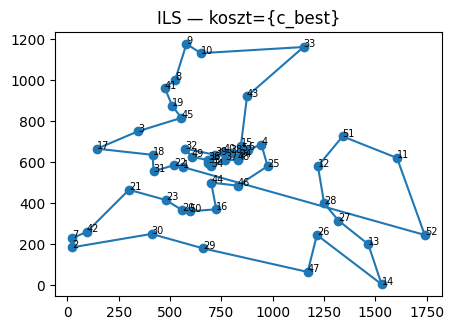

In [6]:

def ils(start_order, rounds=10):
    order, cost, it = hc_2opt(start_order)
    best_o, best_c = order, cost
    for _ in range(rounds):
        i = np.random.randint(1, N-3)
        k = np.random.randint(i+2, N-1)
        order = order[:i] + order[i:k][::-1] + order[k:]
        order, cost, _ = hc_2opt(order)
        if cost < best_c:
            best_o, best_c = order, cost
    return best_o, best_c

# Krótki test ILS
o = random_tour()
o_best, c_best = ils(o, rounds=20)
print("ILS końcowy koszt:", c_best)
plot_tour(o_best, f"ILS — koszt={{c_best}}")
